# Урок 6. Многоклассовая классификация.

Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [1]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
### YOUR CODE HERE ###
wine_dataset = load_wine()

In [3]:
wine_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
n1 = 9 # индекс первого признака
n2 = 11 # индекс второго признака
n3 = 12 # индекс третьего признака

In [5]:
x1 = wine_dataset.data.T[n1]
x2 = wine_dataset.data.T[n2]
x3 = wine_dataset.data.T[n3]

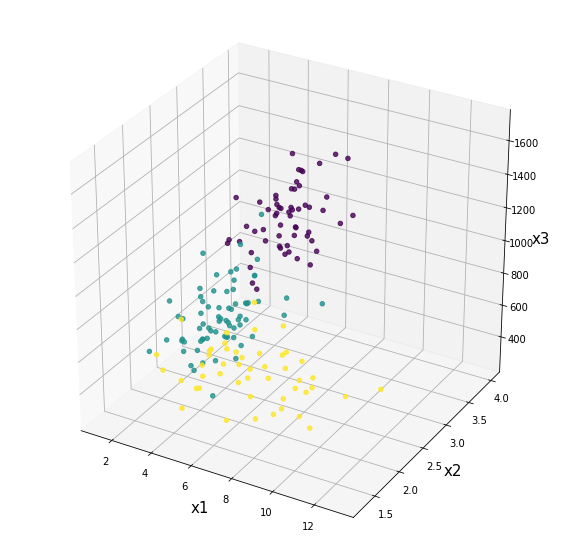

In [6]:
plt.figure(figsize=(10, 10)) 
ax = plt.axes(projection='3d')

ax.scatter3D(x1, x2, x3, alpha=.8, c=wine_dataset.target)
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15)
ax.set_zlabel('x3', fontsize=15)

plt.grid()
plt.show()

In [7]:
n = np.arange(0, wine_dataset.data.shape[1]) # [0 .. 12]
n = np.delete(n, [n1, n2, n3]) # удаление всех кроме рассматриваемых признаков
n

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10])

In [8]:
wine_dataset_new = np.delete(wine_dataset.data, n, axis=1)
wine_dataset_new

array([[5.640000e+00, 3.920000e+00, 1.065000e+03],
       [4.380000e+00, 3.400000e+00, 1.050000e+03],
       [5.680000e+00, 3.170000e+00, 1.185000e+03],
       [7.800000e+00, 3.450000e+00, 1.480000e+03],
       [4.320000e+00, 2.930000e+00, 7.350000e+02],
       [6.750000e+00, 2.850000e+00, 1.450000e+03],
       [5.250000e+00, 3.580000e+00, 1.290000e+03],
       [5.050000e+00, 3.580000e+00, 1.295000e+03],
       [5.200000e+00, 2.850000e+00, 1.045000e+03],
       [7.220000e+00, 3.550000e+00, 1.045000e+03],
       [5.750000e+00, 3.170000e+00, 1.510000e+03],
       [5.000000e+00, 2.820000e+00, 1.280000e+03],
       [5.600000e+00, 2.900000e+00, 1.320000e+03],
       [5.400000e+00, 2.730000e+00, 1.150000e+03],
       [7.500000e+00, 3.000000e+00, 1.547000e+03],
       [7.300000e+00, 2.880000e+00, 1.310000e+03],
       [6.200000e+00, 2.650000e+00, 1.280000e+03],
       [6.600000e+00, 2.570000e+00, 1.130000e+03],
       [8.700000e+00, 2.820000e+00, 1.680000e+03],
       [5.100000e+00, 3.360000e

In [9]:
x_train, x_test, y_train, y_test = train_test_split(wine_dataset_new, wine_dataset.target, random_state = 17) 

**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [11]:
skf = StratifiedKFold(n_splits = 5, random_state = 17)
skf

C:\Python\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


StratifiedKFold(n_splits=5, random_state=17, shuffle=False)

### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
### YOUR CODE HERE ###
lr = LogisticRegression(random_state = 17, multi_class = 'ovr')
lr_model = lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)

In [14]:
#доля правильных ответов на тестовой выборке
accuracy_score(y_test, lr_predictions)

0.9111111111111111

In [15]:
cross_val_score(lr, wine_dataset_new, wine_dataset.target, cv = skf).mean()

0.9442857142857143

### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [16]:
from sklearn.svm import SVC

In [17]:
### YOUR CODE HERE ###
svc = SVC(random_state = 17)
svc_model = svc.fit(x_train, y_train)
svc_predictions = svc.predict(x_test)

In [18]:
#доля правильных ответов на тестовой выборке
accuracy_score(y_test, svc_predictions)

0.6222222222222222

In [19]:
cross_val_score(svc, wine_dataset_new, wine_dataset.target, cv = skf).mean()

0.6804761904761905

Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем.

### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
### YOUR CODE HERE ###
conf_mtrx_lr = confusion_matrix(y_test, lr_predictions)
conf_mtrx_lr
# классификатор путает объекты первого класса с объектами второго класса

array([[ 9,  0,  0],
       [ 0, 19,  0],
       [ 0,  4, 13]], dtype=int64)

In [22]:
conf_mtrx_svc = confusion_matrix(y_test, svc_predictions)
conf_mtrx_svc
# классификатор путает объекты нулевого класса с объектами второго класса

array([[ 9,  0,  0],
       [ 0, 19,  0],
       [ 2, 15,  0]], dtype=int64)

### 5.
Для каждой модели выведите classification report.

In [23]:
### YOUR CODE HERE ###
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.90        19
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



In [24]:
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.56      1.00      0.72        19
           2       0.00      0.00      0.00        17

    accuracy                           0.62        45
   macro avg       0.46      0.67      0.54        45
weighted avg       0.40      0.62      0.48        45



C:\Python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
